KNN

IMPORTS

In [1]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline      

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


KNN WITH MULTIVARIATE OUTLIERS

Preprocessing for KNN

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ArnauAlegre/Prova/main/sample_5000_con_outliers.csv")
df = df.iloc[:,1:]
#Separate data from labels
X = df.drop(["artist_name","track_name","music_genre"],axis=1) # We drop the variables that are categorical
X= pd.get_dummies(X)  #We convert categorical variables to numeric so we can use them in knn
y = df["music_genre"]

(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

#feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

MODEL

In [3]:
# We find the best parameters to use with GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform'),'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']} 
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'} Accuracy= 0.407264838313549


0.382


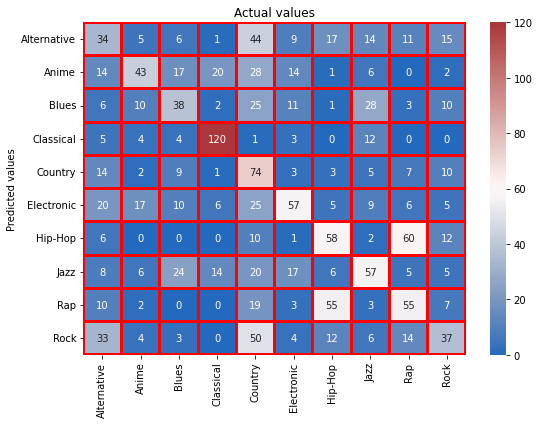

Accuracy: 0.382

              precision    recall  f1-score   support

 Alternative       0.23      0.22      0.22       156
       Anime       0.46      0.30      0.36       145
       Blues       0.34      0.28      0.31       134
   Classical       0.73      0.81      0.77       149
     Country       0.25      0.58      0.35       128
  Electronic       0.47      0.36      0.40       160
     Hip-Hop       0.37      0.39      0.38       149
        Jazz       0.40      0.35      0.38       162
         Rap       0.34      0.36      0.35       154
        Rock       0.36      0.23      0.28       163

    accuracy                           0.38      1500
   macro avg       0.39      0.39      0.38      1500
weighted avg       0.40      0.38      0.38      1500

Interval of confidence: (0.357639282378951, 0.40698172923371395)

Accuracy: 0.382



In [4]:
y_pred = clf.predict(X_test)
# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = clf.classes_,
    yticklabels = clf.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
print()
print(sklearn.metrics.classification_report(y_test, y_pred))
epsilon = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
print()

KNN WITHOUT OUTLIERS

Preprocessing for KNN

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/ArnauAlegre/Prova/main/sample_5000_sin_outliers.csv")
df = df.iloc[:,1:]
#Separate data from labels
X = df.drop(["artist_name","track_name","music_genre"],axis=1) # We drop the variables that are categorical
X= pd.get_dummies(X)  #We convert categorical variables to numeric so we can use them in knn
y = df["music_genre"]

(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

#feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

MODEL

In [6]:
# We find the best parameters to use with GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform'),'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'} Accuracy= 0.38782698361011614


0.39957865168539325


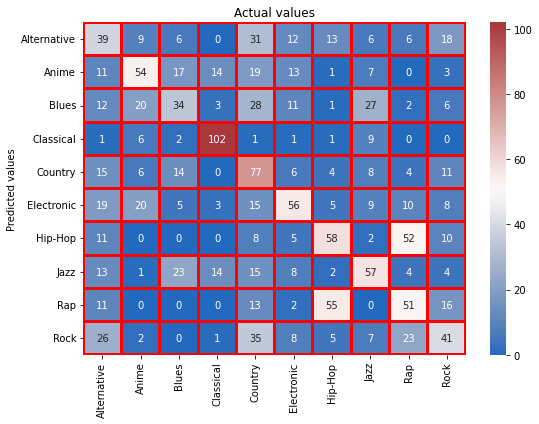

Accuracy: 0.39957865168539325

              precision    recall  f1-score   support

 Alternative       0.25      0.28      0.26       140
       Anime       0.46      0.39      0.42       139
       Blues       0.34      0.24      0.28       144
   Classical       0.74      0.83      0.78       123
     Country       0.32      0.53      0.40       145
  Electronic       0.46      0.37      0.41       150
     Hip-Hop       0.40      0.40      0.40       146
        Jazz       0.43      0.40      0.42       141
         Rap       0.34      0.34      0.34       148
        Rock       0.35      0.28      0.31       148

    accuracy                           0.40      1424
   macro avg       0.41      0.41      0.40      1424
weighted avg       0.40      0.40      0.40      1424

Interval of confidence: (0.374271686687884, 0.4255455517365586)

Accuracy: 0.39957865168539325



In [7]:
y_pred = clf.predict(X_test)
# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = clf.classes_,
    yticklabels = clf.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
print()
print(sklearn.metrics.classification_report(y_test, y_pred))
epsilon = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
print()